# Load Data

In [1]:
# Enable autoreload for development
%load_ext autoreload
%autoreload 2

In [2]:
# Setup
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [4]:
# Load and clean data
from src.load_data import load_data

In [5]:
df = load_data()
df

,No.,Diameter (mm),Speed (rpm),Feed (mm/rev),Thrust force (N),Torque (Nm),Flank wear (mm),Workpiece
0,1,9.0,500,0.13,1088.1,10.67,0.10,cast iron
1,2,9.0,500,0.18,1435.1,14.66,0.13,cast iron
2,3,9.0,500,0.25,1588.3,16.04,0.06,cast iron
3,4,9.0,500,0.36,1669.8,17.12,0.09,cast iron
4,5,9.0,400,0.13,1150.9,11.22,0.12,cast iron
...,...,...,...,...,...,...,...,...
160,161,10.0,1000,0.50,1960.0,18.13,0.13,copper
161,162,7.5,1000,0.50,784.0,7.35,0.10,copper
162,163,5.0,1000,0.50,651.0,6.17,0.07,copper
163,164,10.0,1000,0.71,2009.0,20.58,0.17,copper


# Clean the data

In [6]:
from src.clean_data import clean_dataset, add_features
df_clean = clean_dataset(df)

In [7]:
df.shape

(165, 8)

# Feature Engineering

In [8]:
df_clean = add_features(df_clean)  # ⬅ Feature Engineering : this includes new features

In [9]:
# Identify one-hot workpiece columns (e.g., 'workpiece_b', 'workpiece_c', etc.)
workpiece_cols = [col for col in df_clean.columns if col.startswith('workpiece_')]

In [10]:
df_clean["thrust_force_(n)"] = df_clean["thrust_force_(n)"] / 1000

# New list of Columns

In [11]:
# Confirm all required columns exist
print("Cleaned Columns:", df_clean.columns.tolist())

Cleaned Columns: ['no.', 'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)', 'workpiece_copper', 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 'torque_feed_ratio', 'material_hardness', 'feed_squared', 'speed_squared']


In [12]:
df_clean.shape

(164, 15)

In [13]:
# Correlation of all features with Flank Wear
corr_matrix = df_clean.corr(numeric_only=True)
flank_corr = corr_matrix['flank_wear_(mm)'].sort_values(ascending=False)
print("Correlation with Flankwear")
display(flank_corr)


Correlation with Flankwear


flank_wear_(mm)         1.000000
diameter_(mm)           0.376967
thrust_force_(n)        0.366448
torque_feed_ratio       0.335095
torque_(nm)             0.214763
material_hardness       0.163496
workpiece_copper       -0.032785
no.                    -0.095608
feed_squared           -0.114098
workpiece_mild steel   -0.119936
feed_(mm/rev)          -0.129171
log_feed               -0.133833
speed_squared          -0.197722
speed_(rpm)            -0.204360
speed_per_dia          -0.334941
Name: flank_wear_(mm), dtype: float64

# Plots

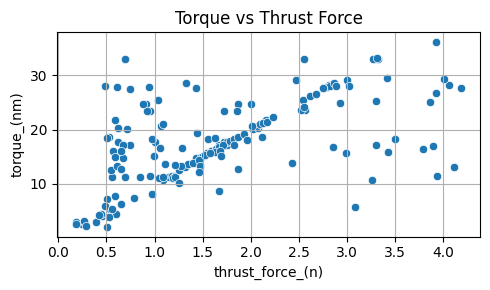

In [14]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='thrust_force_(n)', y='torque_(nm)')
plt.title("Torque vs Thrust Force")
plt.grid(True)
plt.tight_layout()
plt.show()


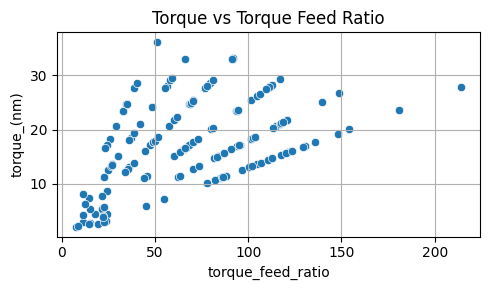

In [15]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='torque_feed_ratio', y='torque_(nm)')
plt.title("Torque vs Torque Feed Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


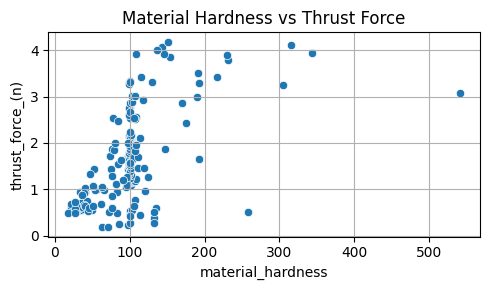

In [16]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='material_hardness', y='thrust_force_(n)')
plt.title("Material Hardness vs Thrust Force")
plt.grid(True)
plt.tight_layout()
plt.show()


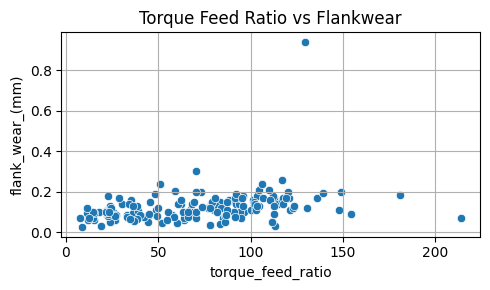

In [17]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='torque_feed_ratio', y='flank_wear_(mm)')
plt.title("Torque Feed Ratio vs Flankwear")
plt.grid(True)
plt.tight_layout()
plt.show()


# Features and targets:

In [18]:
X = df_clean[['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)',
              'speed_per_dia', 'log_feed',
              'torque_feed_ratio', 'material_hardness',
              'feed_squared', 'speed_squared'] + workpiece_cols]
import numpy as np
# Target transformation: log-transform all 3 targets
y = df_clean[['thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)']].copy()

# Log-transform each to handle skewness and stabilize variance
for col in y.columns:
    y[col] = np.log1p(y[col])  # log1p avoids issues with zeros

# Interpretation: 
(a)Torque values seem to follow a roughly normal distribution with no significant outliers.
(b)Flank wear had outliers or noise at the high end, which were removed during cleaning.

In [19]:
# Model tuning
from src.tune_models import tune_random_forest
best_rf, best_params, cv_results = tune_random_forest(X, y)
print("Best Params:", best_params)

import pandas as pd
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values(by='mean_test_score', ascending=False)
#cv_df[['params', 'mean_test_score', 'rank_test_score']].head()

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


# Target: torque_(nm)

In [20]:
# Model training and evaluation
from src.model_train import train_models

results = train_models(X, y)

# Extract test set and predictions (still log-scale here)
X_test = results['X_test']
y_test_log = results['y_test']      # ✅ rename for clarity
models = results['models']
metrics = results['metrics']

# ✅ Inverse transform log-scale targets for real-world evaluation
import numpy as np
y_test_orig = np.expm1(np.clip(y_test_log.values, 0, 20))

In [21]:
import pandas as pd

rows = []

#'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)'

for model_name, model_metrics in metrics.items():
    for i, target in enumerate(y.columns):
        if target == 'torque_(nm)':  # only process 'torque'
            row = {
                'Model': model_name,
                'Target': target,
                'R': model_metrics.get('R', [None]*len(y.columns))[i],
                'R2': model_metrics.get('R2', [None]*len(y.columns))[i],
                'MAE': model_metrics.get('MAE', [None]*len(y.columns))[i],
                'MSE': model_metrics.get('MSE', [None]*len(y.columns))[i],
                'RMSE': model_metrics.get('RMSE', [None]*len(y.columns))[i]
            }
            rows.append(row)

summary_df = pd.DataFrame(rows)
display(summary_df.sort_values(by='Model'))


,Model,Target,R,R2,MAE,MSE,RMSE
2,AdaBoost,torque_(nm),0.955800,0.895951,1.802407,6.395532,2.528939
0,RandomForest,torque_(nm),0.957037,0.913854,1.633205,5.295114,2.301111
1,XGBoost,torque_(nm),0.967756,0.934430,1.242508,4.030328,2.007568


In [22]:
# # Auto-install LIME if not already installed
# try:
#     from lime.lime_tabular import LimeTabularExplainer
# except ImportError:
#     print("LIME not found. Installing it now...")
#     %pip install lime
#     from lime.lime_tabular import LimeTabularExplainer


# LIME explanation for XGBoost prediction of torque_(nm) 

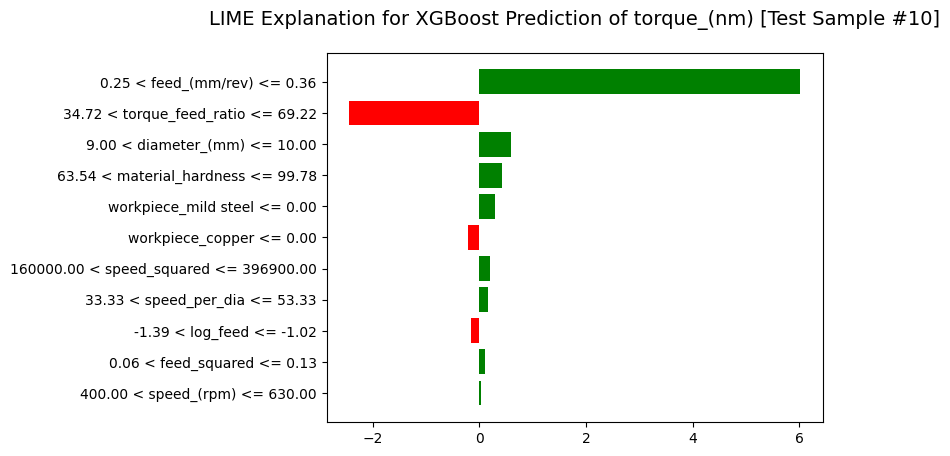


Top contributing features to this prediction:
0.25 < feed_(mm/rev) <= 0.36   : 6.0161
34.72 < torque_feed_ratio <= 69.22 : -2.4460
9.00 < diameter_(mm) <= 10.00  : 0.5931
63.54 < material_hardness <= 99.78 : 0.4215
workpiece_mild steel <= 0.00   : 0.2992
workpiece_copper <= 0.00       : -0.2153
160000.00 < speed_squared <= 396900.00 : 0.2008
33.33 < speed_per_dia <= 53.33 : 0.1629
-1.39 < log_feed <= -1.02      : -0.1617
0.06 < feed_squared <= 0.13    : 0.0975
400.00 < speed_(rpm) <= 630.00 : 0.0365


In [23]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Step 1: Set up the LIME explainer using test set
feature_names = X_test.columns.tolist()

explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 2: Select test instance to explain
idx = 10  # or pick any index you want
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define custom predict_fn for torque_(nm)
# NOTE: torque_(nm) is the second column (index 1) of y
def predict_fn_torque(X):
    log_preds = models['XGBoost'].predict(X)
    torque_log = log_preds[:, 1]
    return np.expm1(torque_log).reshape(-1, 1)

# Step 4: Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_torque,
    num_features=len(feature_names)
)
# Step 5: Plot with white background
fig = exp.as_pyplot_figure()
#fig.patch.set_facecolor('white')   # ✅ set background to white
plt.title(f"LIME Explanation for XGBoost Prediction of torque_(nm) [Test Sample #{idx}]", fontsize=14, pad=20)
plt.show()

# Step 6: Show results
exp.show_in_notebook()  # interactive display
# Optional: textual summary
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")

In [24]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness',
# 'feed_squared', 'speed_squared']

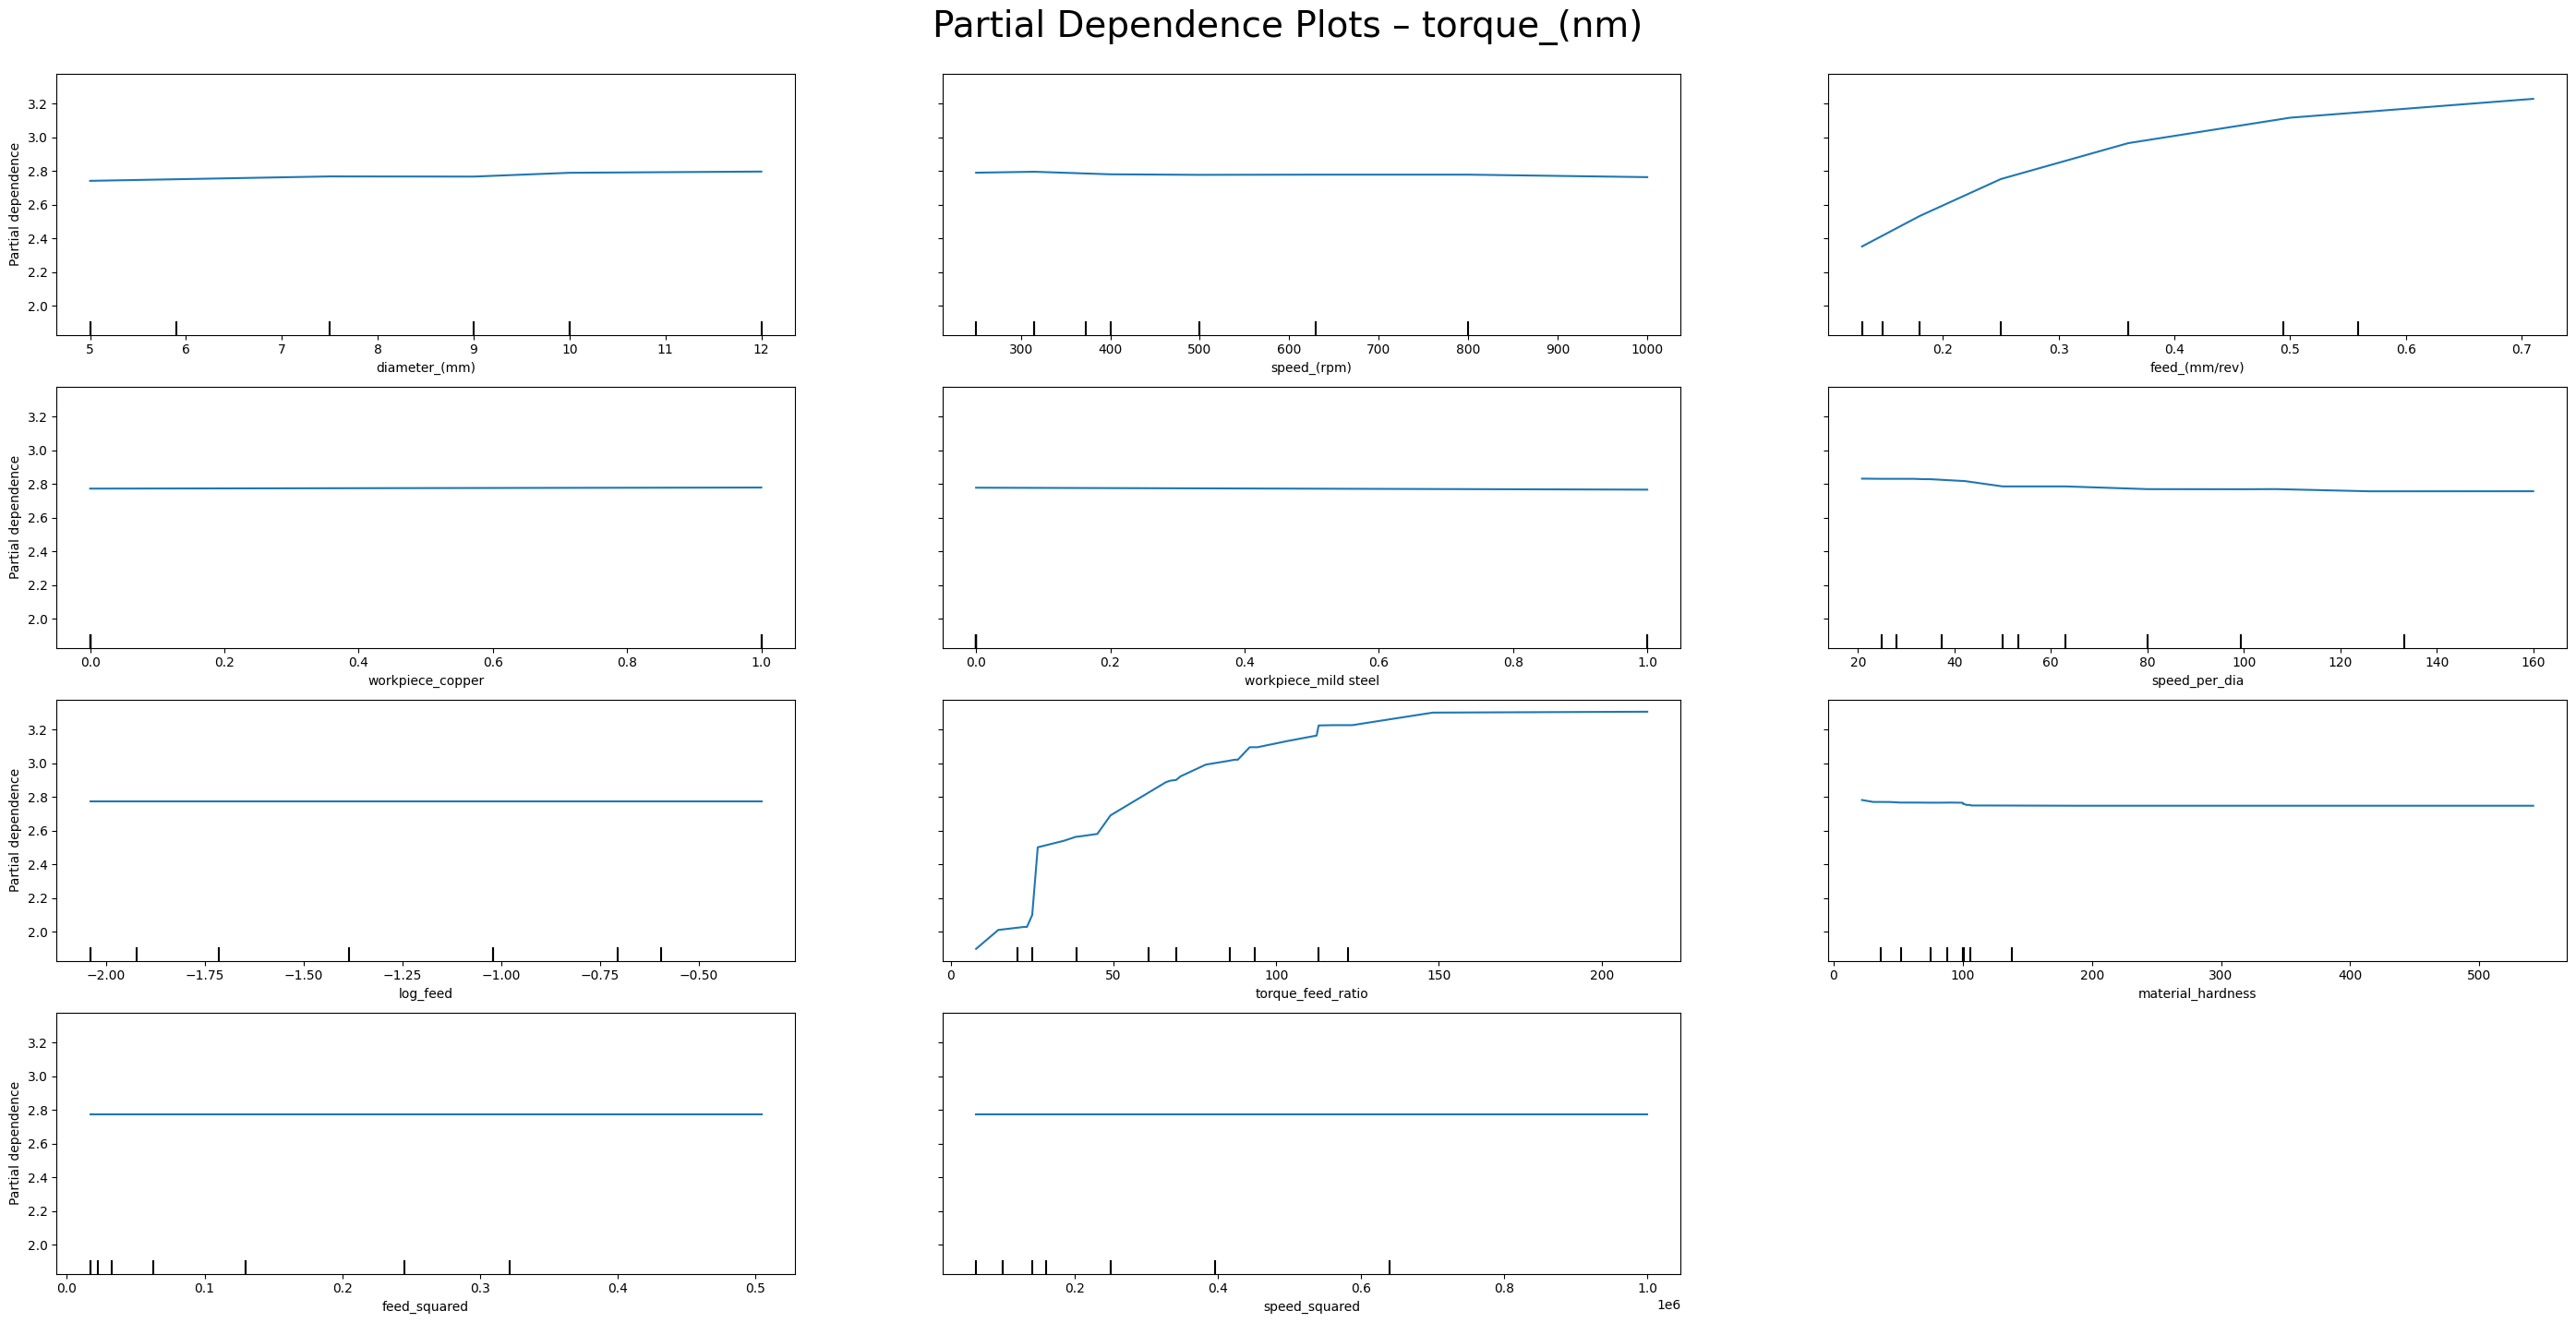

In [25]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Model for torque_(nm)
xgb_model_torque = results['models']['XGBoost'].estimators_[1]

# Features for PDP
features = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'workpiece_copper', 'workpiece_mild steel', 
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared'
]

# Optional: Ensure X_test has only float values
X_test = X_test.astype(float)

# Create PDP
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_torque,
    X=X_test,
    features=features,
    feature_names=X_test.columns.tolist(),
    kind='average',
    grid_resolution=50,
    n_jobs=-1
)

# Resize and finalize the plot
fig = disp.figure_
fig.set_size_inches(28, 14)
plt.suptitle("Partial Dependence Plots – torque_(nm)", fontsize=28, y=1.02) 
plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()


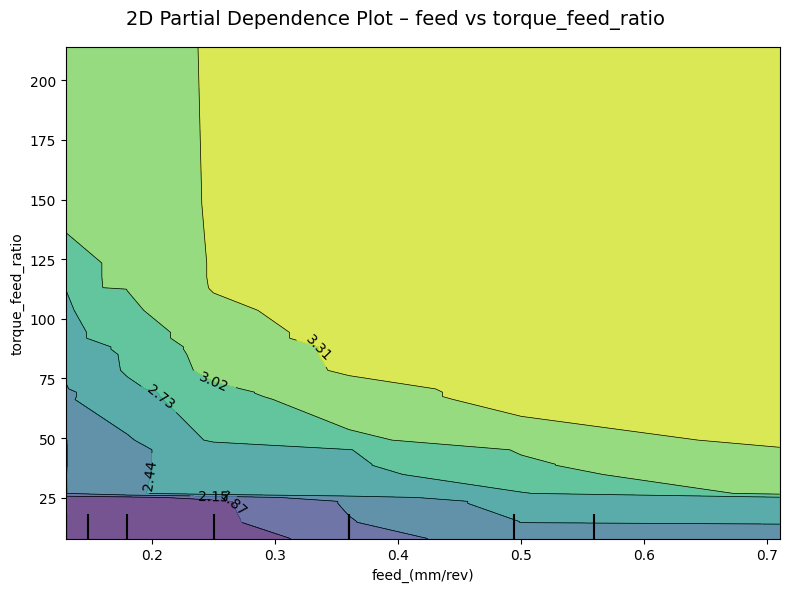

In [26]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

xgb_model_torque = results['models']['XGBoost'].estimators_[1]

# Plot 2D PDP
fig, ax = plt.subplots(figsize=(8, 6))

PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_torque,
    X=X_test,
    features=[('feed_(mm/rev)', 'torque_feed_ratio')],
    feature_names=X_test.columns.tolist(),
    kind='average',
    grid_resolution=50,
    ax=ax
)

plt.suptitle("2D Partial Dependence Plot – feed vs torque_feed_ratio", fontsize=14)
plt.tight_layout()
plt.show()


# Target: flankwear

In [27]:
from src.train_flankwear import train_flankwear_models
X = df_clean[['diameter_(mm)',
 'speed_(rpm)',
 'feed_(mm/rev)',
 'thrust_force_(n)',
 'torque_(nm)',
 #'flank_wear_(mm)',
 'workpiece_copper',
 'workpiece_mild steel',
 'speed_per_dia',
 'log_feed',
 'torque_feed_ratio',
 'material_hardness',
 'feed_squared',
 'speed_squared']]

y_flank = df_clean['flank_wear_(mm)']


In [28]:
results = train_flankwear_models(X, y_flank)

# Collect results into a list of dictionaries
table_data = []

for model_name, result in results.items():
    metrics = result['metrics']
    metrics['Model'] = model_name
    table_data.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(table_data)

# Reorder columns (optional)
cols = ['Model', 'R', 'R2', 'MAE', 'MSE', 'RMSE', 'MAPE']
results_df = results_df[cols]

# Display the table
print("Results of Flankwear:")
print("----------------------")
print(results_df.to_string(index=False)) 


Results of Flankwear:
----------------------
       Model        R       R2      MAE      MSE     RMSE      MAPE
RandomForest 0.702490 0.401190 0.027771 0.001488 0.038570 33.523487
     XGBoost 0.871476 0.779162 0.023187 0.000876 0.029592 27.557532
    AdaBoost 0.570990 0.351403 0.030576 0.001568 0.039601 36.621997


# LIME Explanation for XGBoost prediction of flank_wear :


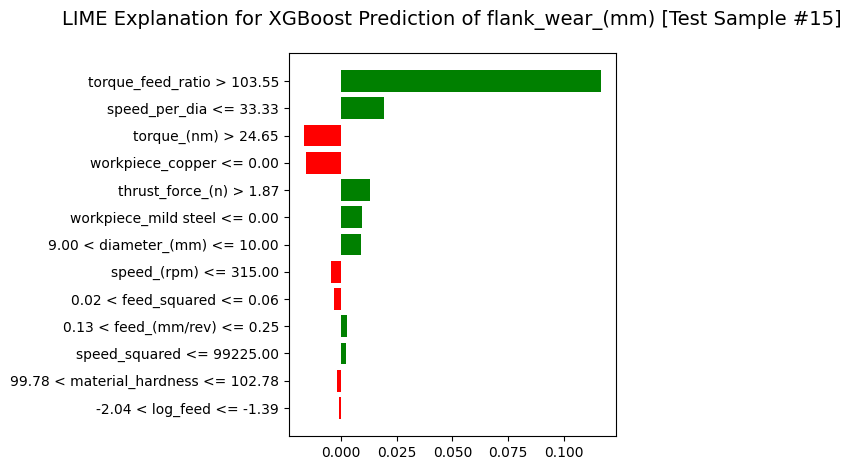


Top contributing features to this prediction:
torque_feed_ratio > 103.55     : 0.1166
speed_per_dia <= 33.33         : 0.0195
torque_(nm) > 24.65            : -0.0167
workpiece_copper <= 0.00       : -0.0156
thrust_force_(n) > 1.87        : 0.0131
workpiece_mild steel <= 0.00   : 0.0094
9.00 < diameter_(mm) <= 10.00  : 0.0092
speed_(rpm) <= 315.00          : -0.0047
0.02 < feed_squared <= 0.06    : -0.0030
0.13 < feed_(mm/rev) <= 0.25   : 0.0028
speed_squared <= 99225.00      : 0.0021
99.78 < material_hardness <= 102.78 : -0.0019
-2.04 < log_feed <= -1.39      : -0.0008


In [29]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract model, test data, and features
xgb_model = results['XGBoost']['model']  # MultiOutputRegressor or single regressor
X_test = results['XGBoost']['X_test']
feature_names = X_test.columns.tolist()

# Step 2: Choose test sample to explain
idx = 15  # or any other index
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define predict function
# If you log-transformed flank_wear during training, handle inverse here
def predict_fn_flank(X):
    log_preds = xgb_model.predict(X)
    return np.expm1(log_preds).reshape(-1, 1)  # inverse of log1p

# Step 4: LIME explainer setup
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 5: Explain the instance
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_flank,
    num_features=len(feature_names)
)

# Step 6: Plot with white background and title
fig = exp.as_pyplot_figure()
fig.patch.set_facecolor('white')
plt.title(f"LIME Explanation for XGBoost Prediction of flank_wear_(mm) [Test Sample #{idx}]", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Step 7: Optional: Save the figure
# fig.savefig(f"lime_flankwear_xgb_sample{idx}.png", bbox_inches='tight', dpi=300)

# Step 8: Print feature contributions
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")


# Explanations for 5 worst predictions for Flank_wear

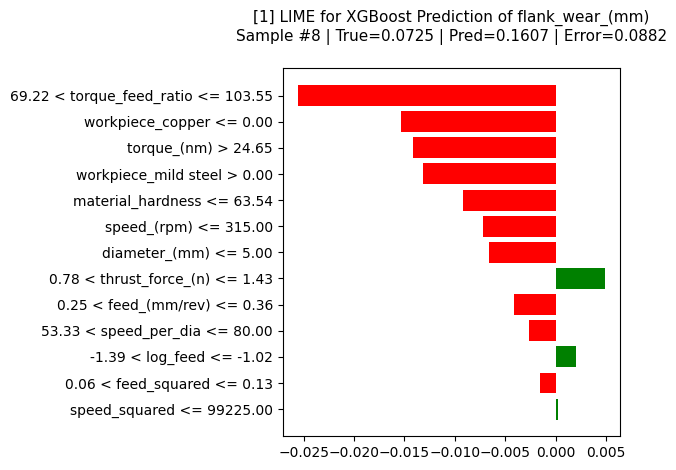


[Sample #8] True: 0.0725, Pred: 0.1607, Error: 0.0882
69.22 < torque_feed_ratio <= 103.55 : -0.0256
workpiece_copper <= 0.00            : -0.0153
torque_(nm) > 24.65                 : -0.0142
workpiece_mild steel > 0.00         : -0.0132
material_hardness <= 63.54          : -0.0092
speed_(rpm) <= 315.00               : -0.0072
diameter_(mm) <= 5.00               : -0.0066
0.78 < thrust_force_(n) <= 1.43     : 0.0049
0.25 < feed_(mm/rev) <= 0.36        : -0.0041
53.33 < speed_per_dia <= 80.00      : -0.0026
-1.39 < log_feed <= -1.02           : 0.0020
0.06 < feed_squared <= 0.13         : -0.0015
speed_squared <= 99225.00           : 0.0003

----------------------------------------------------------------------


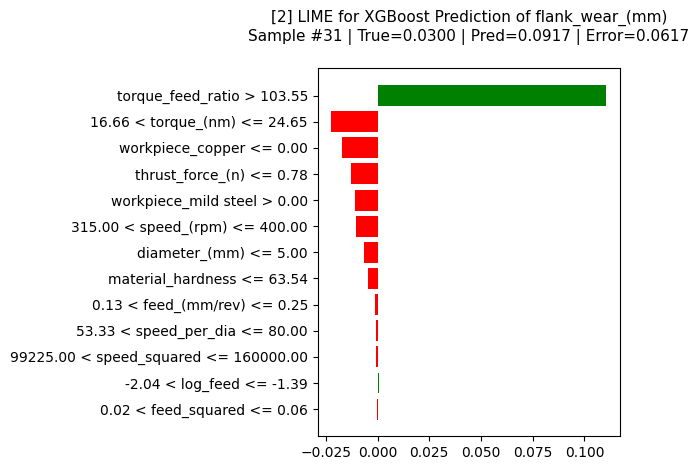


[Sample #31] True: 0.0300, Pred: 0.0917, Error: 0.0617
torque_feed_ratio > 103.55          : 0.1106
16.66 < torque_(nm) <= 24.65        : -0.0223
workpiece_copper <= 0.00            : -0.0173
thrust_force_(n) <= 0.78            : -0.0126
workpiece_mild steel > 0.00         : -0.0109
315.00 < speed_(rpm) <= 400.00      : -0.0104
diameter_(mm) <= 5.00               : -0.0063
material_hardness <= 63.54          : -0.0046
0.13 < feed_(mm/rev) <= 0.25        : -0.0011
53.33 < speed_per_dia <= 80.00      : -0.0008
99225.00 < speed_squared <= 160000.00 : -0.0007
-2.04 < log_feed <= -1.39           : 0.0007
0.02 < feed_squared <= 0.06         : -0.0003

----------------------------------------------------------------------


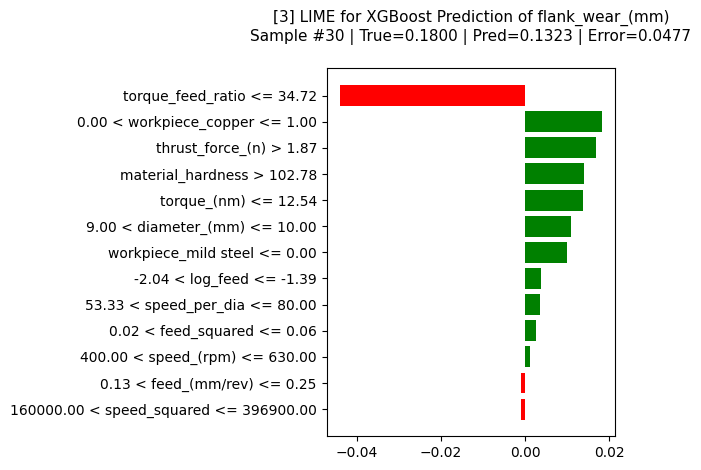


[Sample #30] True: 0.1800, Pred: 0.1323, Error: 0.0477
torque_feed_ratio <= 34.72          : -0.0441
0.00 < workpiece_copper <= 1.00     : 0.0183
thrust_force_(n) > 1.87             : 0.0170
material_hardness > 102.78          : 0.0140
torque_(nm) <= 12.54                : 0.0137
9.00 < diameter_(mm) <= 10.00       : 0.0108
workpiece_mild steel <= 0.00        : 0.0100
-2.04 < log_feed <= -1.39           : 0.0038
53.33 < speed_per_dia <= 80.00      : 0.0036
0.02 < feed_squared <= 0.06         : 0.0026
400.00 < speed_(rpm) <= 630.00      : 0.0013
0.13 < feed_(mm/rev) <= 0.25        : -0.0010
160000.00 < speed_squared <= 396900.00 : -0.0009

----------------------------------------------------------------------


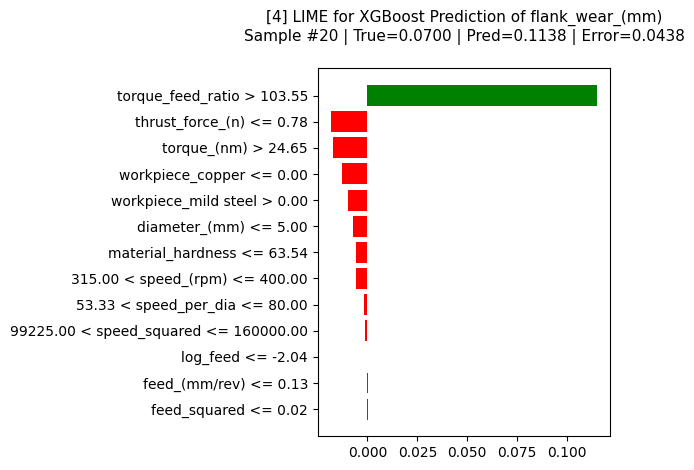


[Sample #20] True: 0.0700, Pred: 0.1138, Error: 0.0438
torque_feed_ratio > 103.55          : 0.1150
thrust_force_(n) <= 0.78            : -0.0183
torque_(nm) > 24.65                 : -0.0173
workpiece_copper <= 0.00            : -0.0127
workpiece_mild steel > 0.00         : -0.0096
diameter_(mm) <= 5.00               : -0.0073
material_hardness <= 63.54          : -0.0059
315.00 < speed_(rpm) <= 400.00      : -0.0055
53.33 < speed_per_dia <= 80.00      : -0.0017
99225.00 < speed_squared <= 160000.00 : -0.0014
log_feed <= -2.04                   : -0.0004
feed_(mm/rev) <= 0.13               : 0.0003
feed_squared <= 0.02                : 0.0003

----------------------------------------------------------------------


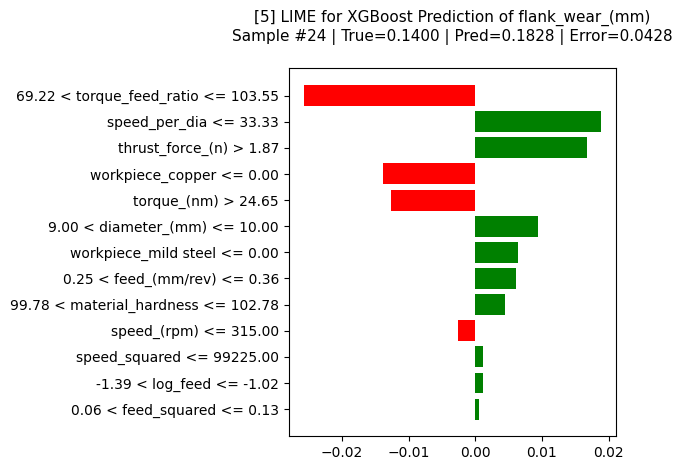


[Sample #24] True: 0.1400, Pred: 0.1828, Error: 0.0428
69.22 < torque_feed_ratio <= 103.55 : -0.0257
speed_per_dia <= 33.33              : 0.0189
thrust_force_(n) > 1.87             : 0.0167
workpiece_copper <= 0.00            : -0.0138
torque_(nm) > 24.65                 : -0.0126
9.00 < diameter_(mm) <= 10.00       : 0.0093
workpiece_mild steel <= 0.00        : 0.0065
0.25 < feed_(mm/rev) <= 0.36        : 0.0061
99.78 < material_hardness <= 102.78 : 0.0045
speed_(rpm) <= 315.00               : -0.0025
speed_squared <= 99225.00           : 0.0012
-1.39 < log_feed <= -1.02           : 0.0011
0.06 < feed_squared <= 0.13         : 0.0006

----------------------------------------------------------------------


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# === Extract what we need ===
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
y_test_log = results['XGBoost']['y_test']
y_test_true = np.expm1(y_test_log)  # inverse log1p
y_pred_log = xgb_model.predict(X_test)
y_pred_true = np.expm1(y_pred_log)

# === Calculate absolute errors ===
errors = np.abs(y_test_true - y_pred_true)

# === Get indices of top N worst errors ===
N = 5  # 🔁 change this to any N you want
worst_indices = np.argsort(-errors)[:N]

# === Create LIME explainer ===
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=X_test.columns.tolist(),
    mode='regression'
)

# === Loop through top N errors and explain ===
for rank, idx in enumerate(worst_indices, 1):
    instance = X_test.iloc[idx].values.reshape(1, -1)

    def predict_fn(X):
        log_preds = xgb_model.predict(X)
        return np.expm1(log_preds).reshape(-1, 1)

    exp = explainer.explain_instance(
        data_row=instance.flatten(),
        predict_fn=predict_fn,
        num_features=len(X_test.columns)
    )

    # === Plot explanation ===
    fig = exp.as_pyplot_figure()
    fig.patch.set_facecolor('white')
    plt.title(f"[{rank}] LIME for XGBoost Prediction of flank_wear_(mm)\nSample #{idx} | True={y_test_true.iloc[idx]:.4f} | Pred={y_pred_true[idx]:.4f} | Error={errors.iloc[idx]:.4f}",
          fontsize=11, pad=20)
    plt.tight_layout()
    plt.show()

    # === Print text summary ===
    print(f"\n[Sample #{idx}] True: {y_test_true.iloc[idx]:.4f}, Pred: {y_pred_true[idx]:.4f}, Error: {errors.iloc[idx]:.4f}")
    for feature, weight in exp.as_list():
        print(f"{feature:35} : {weight:.4f}")
    print("\n" + "-"*70)


# PDP Explanation for XGBoost prediction of flank_wear :


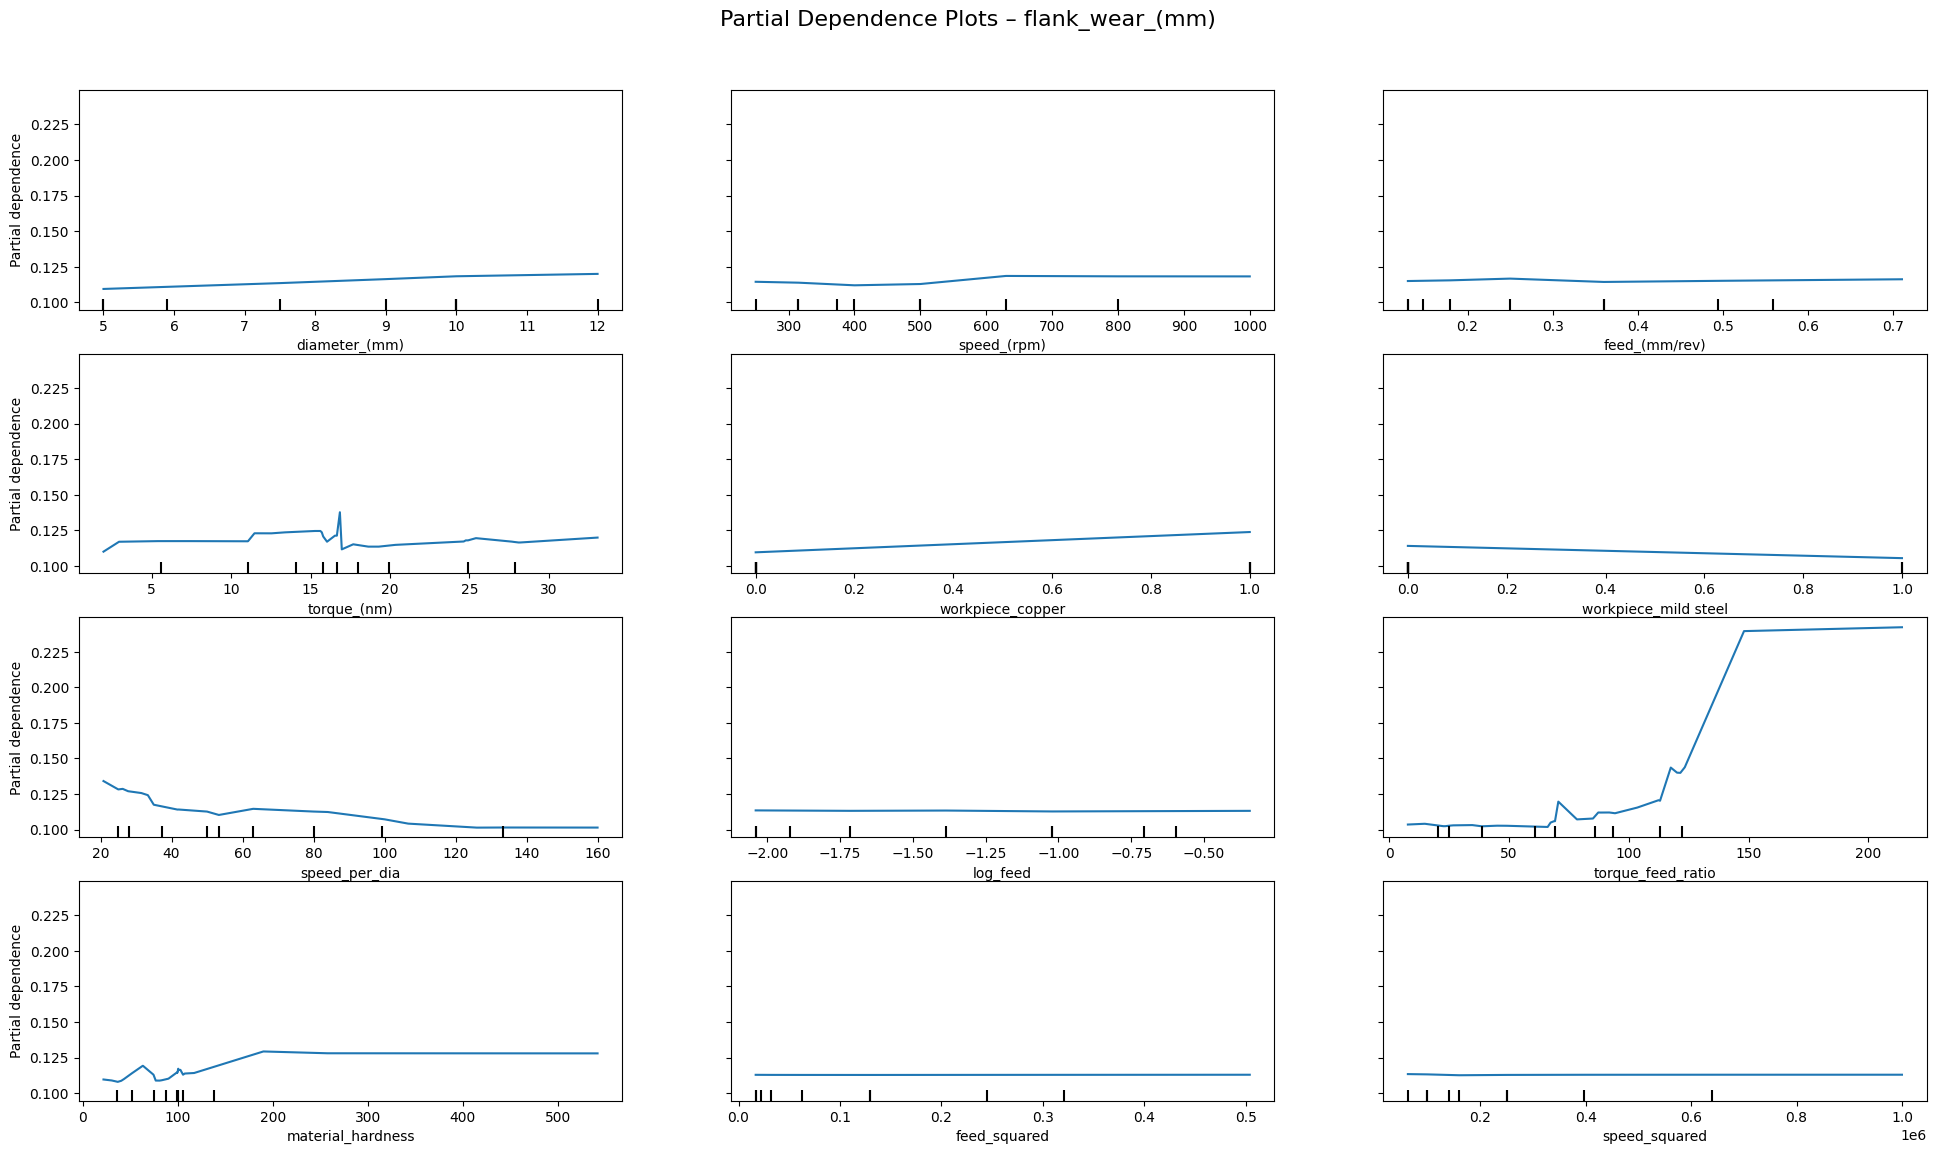

In [31]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Step 1: Extract model and test data
xgb_model_flank = results['XGBoost']['model']
X_test_flank = results['XGBoost']['X_test']  # from your returned dict
# Convert all integer columns in X_test_flank to float
X_test_flank = X_test_flank.astype(float)

# Step 2: Define feature list for PDP
features_flankwear = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'torque_(nm)', 'workpiece_copper', 'workpiece_mild steel',
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared'
]

# Step 3: Plot PDPs
fig, ax = plt.subplots(figsize=(20, 12))  # Adjust size to avoid overlapping
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_flank,
    X=X_test_flank,
    features=features_flankwear,
    feature_names=X_test_flank.columns.tolist(),
    kind='average',
    grid_resolution=50,
    ax=ax
)

# Step 4: Title and layout
plt.suptitle("Partial Dependence Plots – flank_wear_(mm)", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()


# Target: thrustforce

In [32]:
from src.train_thrustforce import train_thrustforce_models
X = df_clean[['diameter_(mm)',
 'speed_(rpm)',
 'feed_(mm/rev)',
 #'thrust_force_(n)',
 'torque_(nm)',
 'flank_wear_(mm)',
 'workpiece_copper',
 'workpiece_mild steel',
 'speed_per_dia',
 'log_feed',
 'torque_feed_ratio',
 'material_hardness',
 'feed_squared',
 'speed_squared']]

y_thrust = df_clean['thrust_force_(n)']


In [33]:
results = train_thrustforce_models(X, y_thrust)

# Collect results into a list of dictionaries
table_data = []

for model_name, result in results.items():
    metrics = result['metrics']
    metrics['Model'] = model_name
    table_data.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(table_data)

# Reorder columns (optional)
cols = ['Model', 'R', 'R2', 'MAE', 'MSE', 'RMSE', 'MAPE']
results_df = results_df[cols]

# Display the table
print("Results of Thrustforce:")
print("----------------------")
print(results_df.to_string(index=False)) 


Results of Thrustforce:
----------------------
       Model        R       R2      MAE      MSE     RMSE      MAPE
RandomForest 0.980395 0.959887 0.138591 0.028976 0.170223 13.379178
     XGBoost 0.987809 0.975764 0.101853 0.017507 0.132314 10.995946
    AdaBoost 0.967916 0.935613 0.182768 0.046511 0.215663 17.880356


# LIME Explanation for XGBoost prediction of thrustforce :


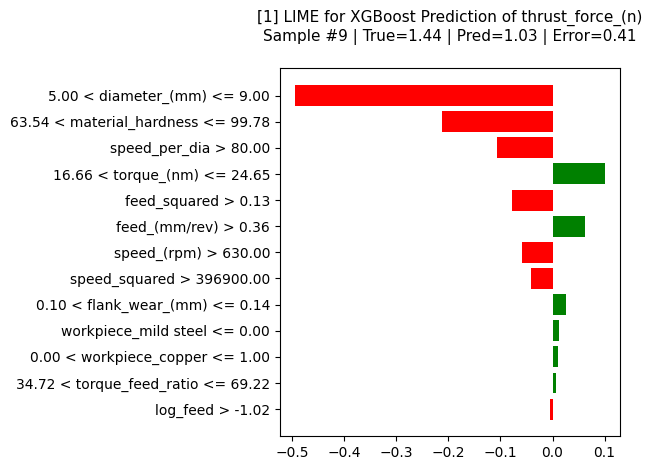


[Sample #9] True: 1.44, Pred: 1.03, Error: 0.41
5.00 < diameter_(mm) <= 9.00        : -0.4936
63.54 < material_hardness <= 99.78  : -0.2114
speed_per_dia > 80.00               : -0.1059
16.66 < torque_(nm) <= 24.65        : 0.0999
feed_squared > 0.13                 : -0.0776
feed_(mm/rev) > 0.36                : 0.0626
speed_(rpm) > 630.00                : -0.0579
speed_squared > 396900.00           : -0.0409
0.10 < flank_wear_(mm) <= 0.14      : 0.0267
workpiece_mild steel <= 0.00        : 0.0115
0.00 < workpiece_copper <= 1.00     : 0.0110
34.72 < torque_feed_ratio <= 69.22  : 0.0070
log_feed > -1.02                    : -0.0039
----------------------------------------------------------------------


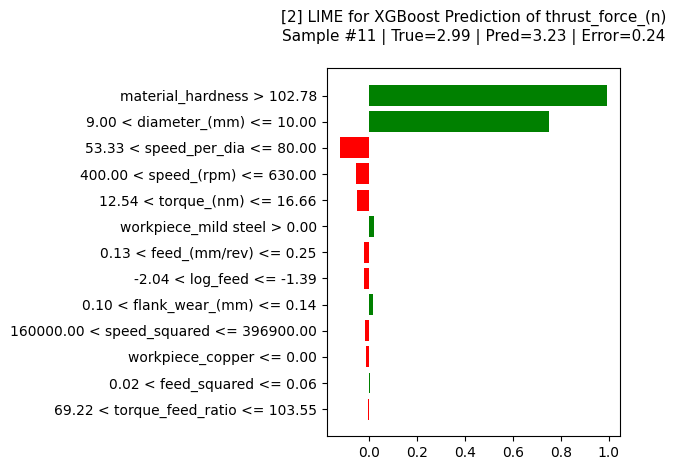


[Sample #11] True: 2.99, Pred: 3.23, Error: 0.24
material_hardness > 102.78          : 0.9911
9.00 < diameter_(mm) <= 10.00       : 0.7491
53.33 < speed_per_dia <= 80.00      : -0.1193
400.00 < speed_(rpm) <= 630.00      : -0.0515
12.54 < torque_(nm) <= 16.66        : -0.0500
workpiece_mild steel > 0.00         : 0.0233
0.13 < feed_(mm/rev) <= 0.25        : -0.0206
-2.04 < log_feed <= -1.39           : -0.0199
0.10 < flank_wear_(mm) <= 0.14      : 0.0199
160000.00 < speed_squared <= 396900.00 : -0.0169
workpiece_copper <= 0.00            : -0.0088
0.02 < feed_squared <= 0.06         : 0.0047
69.22 < torque_feed_ratio <= 103.55 : -0.0030
----------------------------------------------------------------------


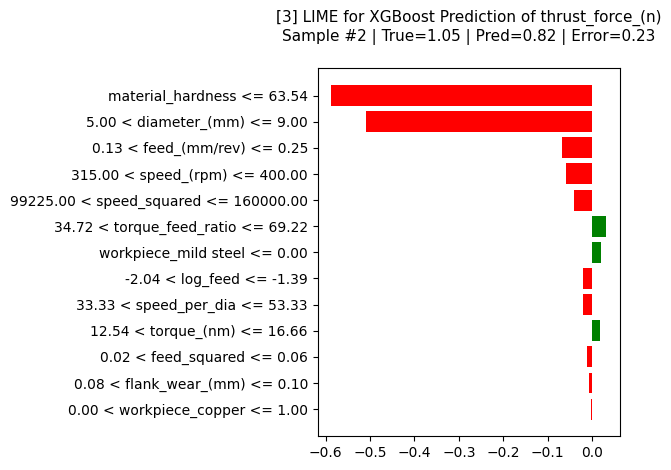


[Sample #2] True: 1.05, Pred: 0.82, Error: 0.23
material_hardness <= 63.54          : -0.5867
5.00 < diameter_(mm) <= 9.00        : -0.5095
0.13 < feed_(mm/rev) <= 0.25        : -0.0682
315.00 < speed_(rpm) <= 400.00      : -0.0597
99225.00 < speed_squared <= 160000.00 : -0.0414
34.72 < torque_feed_ratio <= 69.22  : 0.0320
workpiece_mild steel <= 0.00        : 0.0209
-2.04 < log_feed <= -1.39           : -0.0199
33.33 < speed_per_dia <= 53.33      : -0.0196
12.54 < torque_(nm) <= 16.66        : 0.0186
0.02 < feed_squared <= 0.06         : -0.0111
0.08 < flank_wear_(mm) <= 0.10      : -0.0071
0.00 < workpiece_copper <= 1.00     : -0.0013
----------------------------------------------------------------------


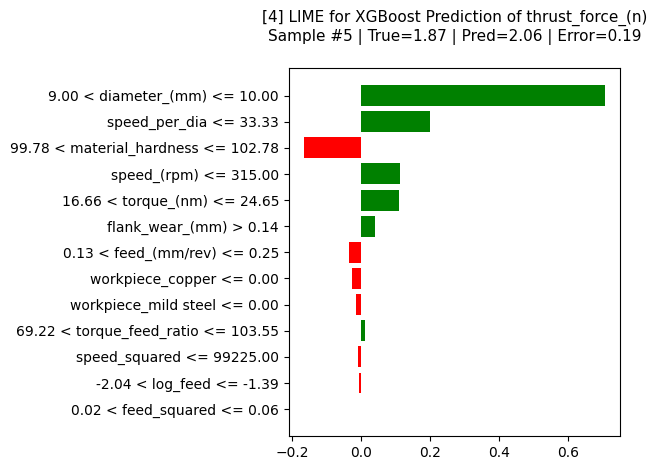


[Sample #5] True: 1.87, Pred: 2.06, Error: 0.19
9.00 < diameter_(mm) <= 10.00       : 0.7066
speed_per_dia <= 33.33              : 0.1999
99.78 < material_hardness <= 102.78 : -0.1653
speed_(rpm) <= 315.00               : 0.1125
16.66 < torque_(nm) <= 24.65        : 0.1097
flank_wear_(mm) > 0.14              : 0.0408
0.13 < feed_(mm/rev) <= 0.25        : -0.0342
workpiece_copper <= 0.00            : -0.0260
workpiece_mild steel <= 0.00        : -0.0148
69.22 < torque_feed_ratio <= 103.55 : 0.0112
speed_squared <= 99225.00           : -0.0069
-2.04 < log_feed <= -1.39           : -0.0043
0.02 < feed_squared <= 0.06         : 0.0010
----------------------------------------------------------------------


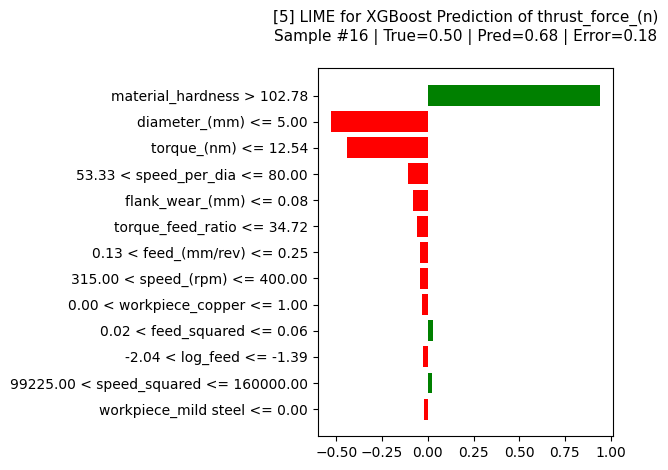


[Sample #16] True: 0.50, Pred: 0.68, Error: 0.18
material_hardness > 102.78          : 0.9396
diameter_(mm) <= 5.00               : -0.5289
torque_(nm) <= 12.54                : -0.4416
53.33 < speed_per_dia <= 80.00      : -0.1105
flank_wear_(mm) <= 0.08             : -0.0830
torque_feed_ratio <= 34.72          : -0.0604
0.13 < feed_(mm/rev) <= 0.25        : -0.0427
315.00 < speed_(rpm) <= 400.00      : -0.0401
0.00 < workpiece_copper <= 1.00     : -0.0312
0.02 < feed_squared <= 0.06         : 0.0288
-2.04 < log_feed <= -1.39           : -0.0274
99225.00 < speed_squared <= 160000.00 : 0.0210
workpiece_mild steel <= 0.00        : -0.0199
----------------------------------------------------------------------


In [34]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# === Extract model and test data ===
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
y_test_log = results['XGBoost']['y_test']
y_test_true = np.expm1(y_test_log)
y_pred_true = np.expm1(xgb_model.predict(X_test))

# === Calculate absolute errors ===
errors = np.abs(y_test_true - y_pred_true)

# === Get indices of top N worst errors ===
N = 5
worst_indices = np.argsort(-errors)[:N]

# === Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=X_test.columns.tolist(),
    mode='regression'
)

# === Loop through top N errors and explain
for rank, idx in enumerate(worst_indices, 1):
    instance = X_test.iloc[idx].values.reshape(1, -1)

    def predict_fn(X):
        return np.expm1(xgb_model.predict(X)).reshape(-1, 1)

    exp = explainer.explain_instance(
        data_row=instance.flatten(),
        predict_fn=predict_fn,
        num_features=len(X_test.columns)
    )

    # Plot LIME explanation
    fig = exp.as_pyplot_figure()
    fig.patch.set_facecolor('white')
    plt.title(f"[{rank}] LIME for XGBoost Prediction of thrust_force_(n)\nSample #{idx} | True={y_test_true.iloc[idx]:.2f} | Pred={y_pred_true[idx]:.2f} | Error={errors.iloc[idx]:.2f}",
              fontsize=11, pad=20)
    plt.tight_layout()
    plt.show()

    # Text summary
    print(f"\n[Sample #{idx}] True: {y_test_true.iloc[idx]:.2f}, Pred: {y_pred_true[idx]:.2f}, Error: {errors.iloc[idx]:.2f}")
    for feature, weight in exp.as_list():
        print(f"{feature:35} : {weight:.4f}")
    print("-" * 70)


# PDP Explanation for XGBoost prediction of thrustforce :

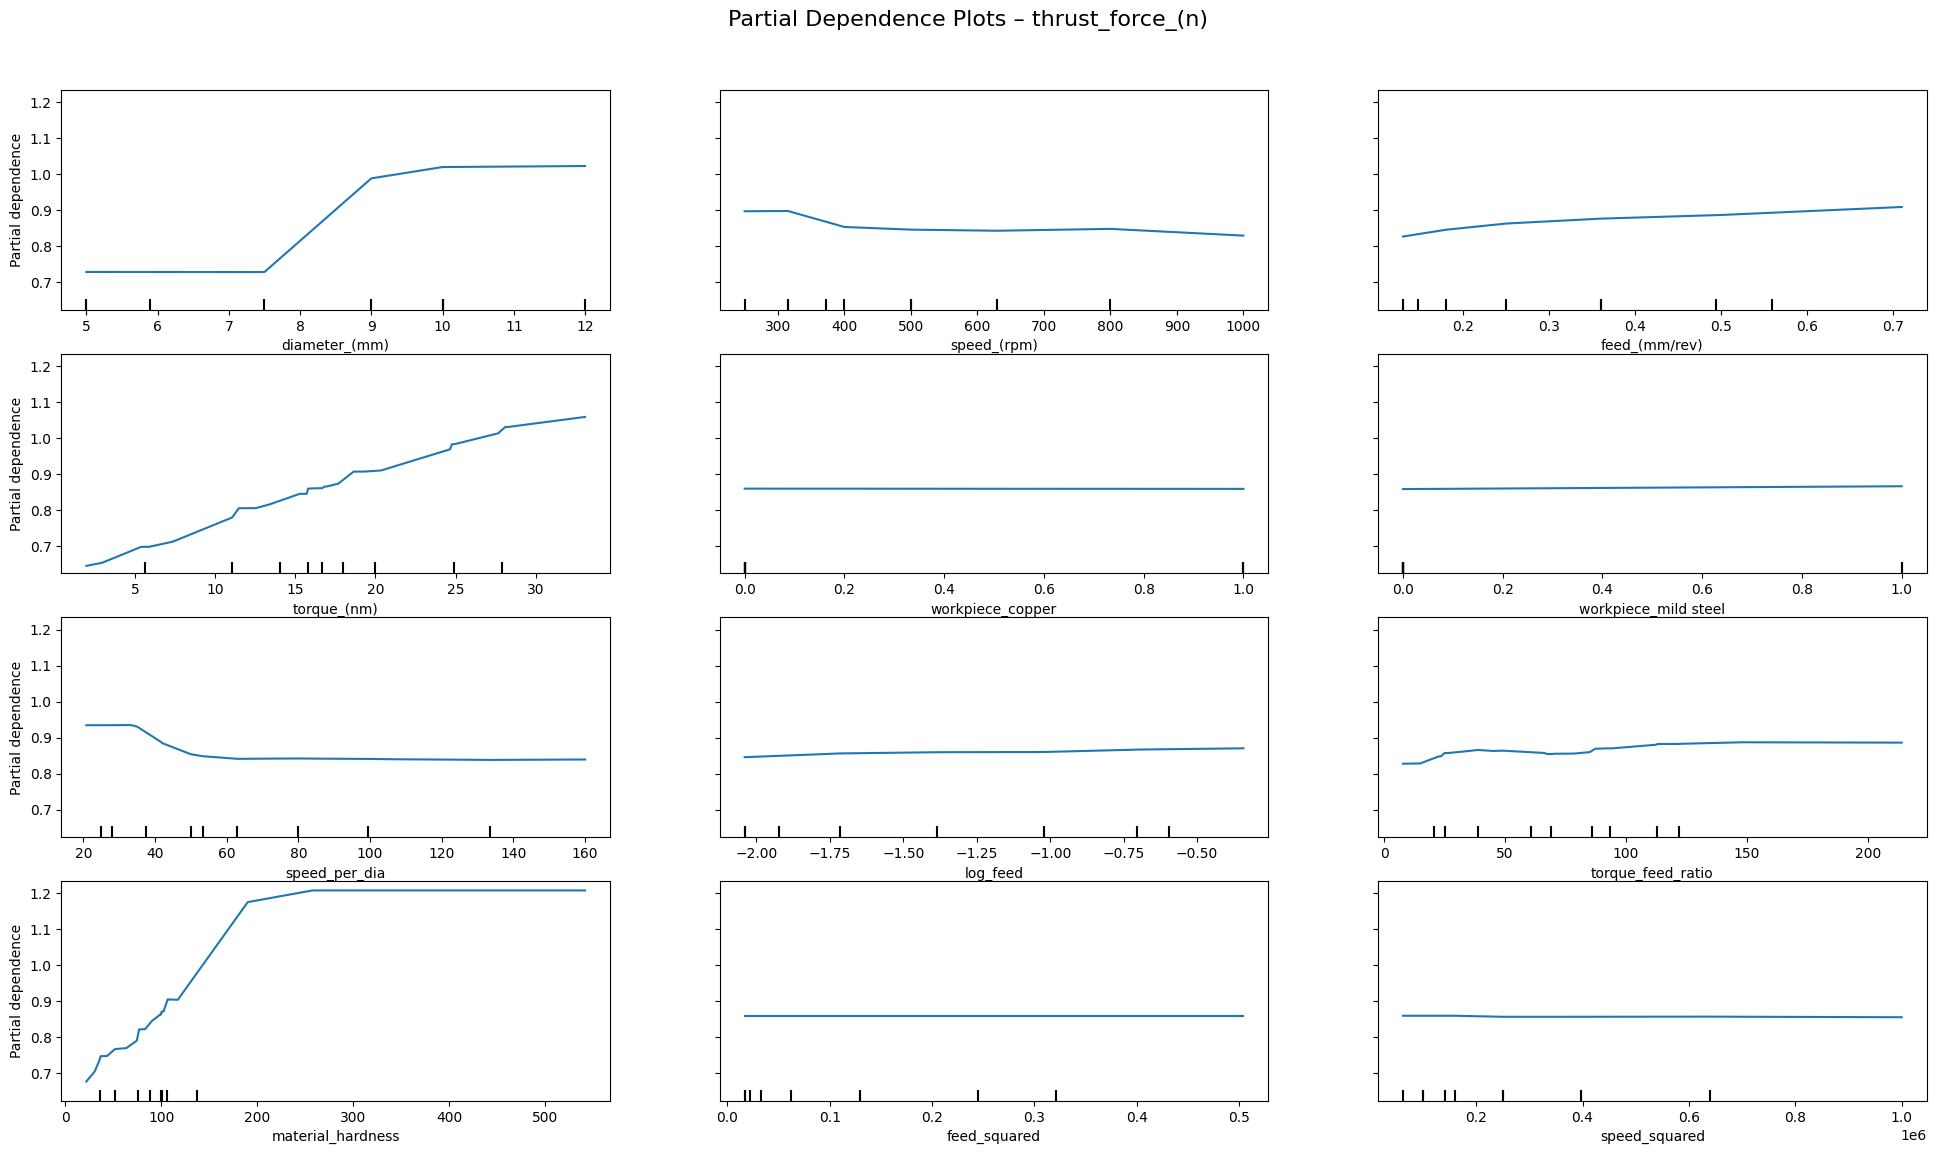

In [35]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# XGBoost model and test features
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']

# Choose features to explain
features_to_plot = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'torque_(nm)', 'workpiece_copper', 'workpiece_mild steel',
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared']  
fig, ax = plt.subplots(figsize=(20, 12)) 
# Plot PDPs
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model,
    X=X_test,
    features=features_to_plot,
    feature_names=X_test.columns,
    kind='average',              # or 'individual' if you want ICE curves
    grid_resolution=50,
    n_jobs=-1,
    ax=ax
)

plt.suptitle("Partial Dependence Plots – thrust_force_(n)", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

